
# <center> **Analysis of Localities in Bangalore and Chennai**

## **Importing Necessary libraries**

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

import folium

from sklearn.cluster import KMeans

##**Plotting maps of Bangalore and Chennai**

In [0]:
BLR_Lat = 12.9716  # Latitude of Bangalore City
BLR_Long = 77.5946 # Longitude of Bangalore City

CHN_Lat = 13.0827  # Latitude of Chennai City
CHN_Long = 80.2707 # Longitude of Chennai City

print('The geographical coordinates of Chennai are {} , {} and the coordinates for Bangalore are {} , {}.'.format(CHN_Lat, CHN_Long, BLR_Lat , BLR_Long ))

The geographical coordinates of Chennai are 13.0827 , 80.2707 and the coordinates for Bangalore are 12.9716 , 77.5946.


In [0]:
# Plotting Map of Bangalore
blr_map = folium.Map(location = [BLR_Lat, BLR_Long],zoom_start = 12)
folium.Marker([BLR_Lat, BLR_Long]).add_to(blr_map)
blr_map.save("Bangalore Map.html")
blr_map

In [0]:
# Plotting Map of Chennai
chn_map = folium.Map(location = [CHN_Lat, CHN_Long],zoom_start = 12)
folium.Marker([CHN_Lat, CHN_Long]).add_to(chn_map)
chn_map.save("Chennai Map.html")
chn_map

##**Obtaining venue details  from Foursquare API**
 100 Locations are accessed from the API within the vicinity of 10 KM distance from the geographical coordinates of the two cities. The details which are accessed are:
 
*   VENUE NAME
*   CATEGORY  
*   LATITUDE
*   LONGITUDE

In [0]:
CLIENT_ID = 'CAOUWJA5HOWJ1NQFWGPH4OM0MN40LBWXB1ZJCB1JO5U5HZ5G' # Foursquare ID
CLIENT_SECRET = 'GO13Q2X4YTT45NCVDVZQO4POSJV0DV4OXFLZRWJZ13O2P5UF' # Foursquare Secret
VERSION = '20200320' # Foursquare API version

The function **get_category_type** is used to obtain correct category for the venue

In [0]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Obtaining venues in Bangalore from Foursquare API 

In [0]:
foursquare_venues_blr = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])
LIMIT = 100 # no of venues
radius = 10000 # 10 KM radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, BLR_Lat,  BLR_Long, radius, LIMIT) 

# Processing  JSON file obtained from URL
result = requests.get(url).json()
venues = result['response']['groups'][0]['items']
foursquare_venues_blr = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
foursquare_venues_blr = foursquare_venues_blr.loc[:, filtered_columns]

# filter the category for each row
foursquare_venues_blr['venue.categories'] = foursquare_venues_blr.apply(get_category_type, axis=1)

# clean columns
foursquare_venues_blr.columns = [col.split(".")[-1] for col in foursquare_venues_blr.columns]


print('{} venues in Bangalore were returned by Foursquare.'.format(foursquare_venues_blr.shape[0]))

100 venues in Bangalore were returned by Foursquare.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


In [0]:
foursquare_venues_blr.head()

,name,categories,lat,lng
0,JW Marriott Hotel Bengaluru,Hotel,12.972362,77.595051
1,UB City,Shopping Mall,12.971709,77.595905
2,Toscano,Italian Restaurant,12.971980,77.596066
3,Café Noir,French Restaurant,12.971995,77.596001
4,Cubbon Park,Park,12.977042,77.595277


In [0]:
bangalore_map = folium.Map(location = [BLR_Lat, BLR_Long],zoom_start = 12)

for name, latitude, longitude in zip(foursquare_venues_blr['name'], foursquare_venues_blr['lat'], foursquare_venues_blr['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(bangalore_map)  

bangalore_map.save("Venues by Foursquare_blr.html")
bangalore_map

### Obtaining venues in Chennai from Foursquare API 

In [0]:
foursquare_venues_chn = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])
LIMIT = 100 # no of venues
radius = 10000 # 10 KM radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, CHN_Lat,  CHN_Long, radius, LIMIT) 

# Processing  JSON file obtained from URL
result = requests.get(url).json()
venues = result['response']['groups'][0]['items']
foursquare_venues_chn = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
foursquare_venues_chn = foursquare_venues_chn.loc[:, filtered_columns]

# filter the category for each row
foursquare_venues_chn['venue.categories'] = foursquare_venues_chn.apply(get_category_type, axis=1)

# clean columns
foursquare_venues_chn.columns = [col.split(".")[-1] for col in foursquare_venues_chn.columns]


print('{} venues in Chennai were returned by Foursquare.'.format(foursquare_venues_chn.shape[0]))

100 venues in Chennai were returned by Foursquare.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


In [0]:
foursquare_venues_chn.head()

,name,categories,lat,lng
0,National Durbar Hotel,Indian Restaurant,13.081301,80.270601
1,Links,Snack Place,13.079986,80.254605
2,Escape Cinemas,Multiplex,13.058746,80.264170
3,Bombay Lassi,Dessert Shop,13.066040,80.271222
4,Shree Mithai,Indian Restaurant,13.072118,80.247865


In [0]:
chennai_map = folium.Map(location = [CHN_Lat, CHN_Long],zoom_start = 12)

for name, latitude, longitude in zip(foursquare_venues_chn['name'], foursquare_venues_chn['lat'], foursquare_venues_chn['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(chennai_map)  

chennai_map.save("Venues by Foursquare_chn.html")
chennai_map

##**Obtaining venue details  from Zomato API**
The name, latitude and longitude values obtained from the Foursquare API is fed to the Zomato API which retrieves the following details as listed below:


*   VENUE NAME
*   ADDRESS  
*   PRICE RANGE
*   PRICE FOR TWO
*   RATINGS
*   LATITUDE
*   LONGITUDE







In [0]:
headers = {'user-key': '75473dd2f5b5c439acb48028b2a02ea9'} # Zomato API key

### Venue details in Bangalore

In [0]:
venues_information_blr = [ ]  # Empty list to store values

for index, row in foursquare_venues_blr.iterrows():
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venue.append(result['restaurants'][0]['restaurant']['cuisines'])
        venues_information_blr.append(venue)
    else:
        venues_information_blr.append(np.zeros(6))

  # Inserting values into dataframe
    
zomato_venues_blr = pd.DataFrame(venues_information_blr, 
                                  columns = ['venue', 'latitude','longitude', 'price_for_two', 'price_range', 'rating', 'address','cuisine'])

In [0]:
zomato_venues_blr.head()

,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisine
0,Merak-JW Marriott Hotel,12.9723820000,77.5950510000,1200.0,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...","Asian, Continental"
1,Shiro,12.9717578595,77.5959215686,3000.0,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...","Japanese, Asian"
2,Toscano,12.9718728650,77.5963661447,2400.0,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Italian, European, Mediterranean, Continental,..."
3,Cafe Noir,12.9721260729,77.5964409113,1500.0,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Continental, Italian, Desserts, Cafe, Beverages"
4,Mathsya Darshini,12.9752955602,77.5888576359,550.0,2.0,3.7,"KFDC Ltd, Cubbon Park, K.R.Circle, Lavelle Roa...",Mangalorean


In [0]:
# Conversion of data type of latitude and longitude to enable plotting
zomato_venues_blr[["latitude","longitude"]]= zomato_venues_blr[["latitude","longitude"]].astype(float)
zomato_venues_blr.dtypes

venue             object
latitude         float64
longitude        float64
price_for_two    float64
price_range      float64
rating            object
address           object
cuisine           object
dtype: object

In [0]:
bluru_map = folium.Map(location = [BLR_Lat,BLR_Long ], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues_blr['venue'], zomato_venues_blr['address'], 
                                               zomato_venues_blr['latitude'], zomato_venues_blr['longitude']):
    label = '{}, {}'.format(venue, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'yellow',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(bluru_map) 

bluru_map.save("Venues by Zomato_blr.html")
bluru_map

### Venue details in Chennai

In [0]:
venues_information_chn = [ ]  # Empty list to store values
for index, row in foursquare_venues_chn.iterrows():
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venue.append(result['restaurants'][0]['restaurant']['cuisines'])
        venues_information_chn.append(venue)
    else:
        venues_information_chn.append(np.zeros(6))
  # Inserting values into dataframe  
zomato_venues_chn = pd.DataFrame(venues_information_chn, columns = ['venue', 'latitude','longitude', 'price_for_two', 'price_range', 'rating', 'address','cuisine'])

In [0]:
zomato_venues_chn.head()


,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisine
0,Hotel Greens Gate,13.0812352611,80.2702522650,550.0,2.0,0,"12 & 13, V V Koil Street, Opposite Rippon Buil...","Chinese, North Indian"
1,Links,13.0798789882,80.2545083687,250.0,1.0,4.3,"22, Raja Annamalai Road, Purasavakkam, Chennai","Fast Food, Street Food"
2,ID,13.0553958872,80.2580730245,300.0,1.0,4.2,"8, 1st Floor, Sathyam Cinemas Complex, Thiruvi...",South Indian
3,Bombay Lassi,13.0656156277,80.2709348872,100.0,1.0,4.7,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",Street Food
4,Shree Mithai,13.0721686982,80.2479419857,300.0,1.0,4.6,"18, Dr TV Road, Chetpet, Chennai","Mithai, Street Food, Fast Food"


In [0]:
# Conversion of data type of latitude and longitude to enable plotting
zomato_venues_chn.dtypes
zomato_venues_chn[["latitude","longitude"]]= zomato_venues_chn[["latitude","longitude"]].astype(float)
zomato_venues_chn.dtypes

venue             object
latitude         float64
longitude        float64
price_for_two    float64
price_range      float64
rating            object
address           object
cuisine           object
dtype: object

In [0]:
chen_map = folium.Map(location = [CHN_Lat,CHN_Long], zoom_start = 12)

for venue, address, latitude, longitude in zip(zomato_venues_chn['venue'], zomato_venues_chn['address'], 
                                               zomato_venues_chn['latitude'], zomato_venues_chn['longitude']):
    label = '{}, {}'.format(venue, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(chen_map) 

chen_map.save("Venues by Zomato_chn.html")
chen_map

## **Data Cleaning**
The data from both the APIs might not always match. Thus, it is important to clean the combined data retrieved from sources properly.

To combine both of these datasets, the latitude and longitude values of the respective venue should match .The latitude and longitude values are rounded  upto 4 decimal places. The difference between the corresponding latitude and longitude values and check if the difference is less than 0.0005 which implies that the location is same.

### Bangalore dataframe


In [0]:
foursquare_venues_blr['lat'] = foursquare_venues_blr['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues_blr['lng'] = foursquare_venues_blr['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues_blr['latitude'] = zomato_venues_blr['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues_blr['longitude'] = zomato_venues_blr['longitude'].apply(lambda lng: round(float(lng), 4))

In [0]:
dataset_b = pd.concat([foursquare_venues_blr, zomato_venues_blr], axis = 1)
dataset_b['lat_diff'] = dataset_b['latitude'] - dataset_b['lat']
dataset_b['lng_diff'] = dataset_b['longitude'] - dataset_b['lng']

In [44]:
unique_venues_b = dataset_b[(abs(dataset_b['lat_diff']) <= 0.0005) & (abs(dataset_b['lng_diff']) <= 0.0005)].reset_index(drop = True)
unique_venues_b

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisine,lat_diff,lng_diff
0,JW Marriott Hotel Bengaluru,Hotel,12.9724,77.5951,Merak-JW Marriott Hotel,12.9724,77.5951,1200.0,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...","Asian, Continental",0.0000,0.0000
1,UB City,Shopping Mall,12.9717,77.5959,Shiro,12.9718,77.5959,3000.0,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...","Japanese, Asian",0.0001,0.0000
2,Toscano,Italian Restaurant,12.9720,77.5961,Toscano,12.9719,77.5964,2400.0,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Italian, European, Mediterranean, Continental,...",-0.0001,0.0003
3,Café Noir,French Restaurant,12.9720,77.5960,Cafe Noir,12.9721,77.5964,1500.0,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Continental, Italian, Desserts, Cafe, Beverages",0.0001,0.0004
4,Shiro,Japanese Restaurant,12.9719,77.5962,Shiro,12.9718,77.5959,3000.0,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...","Japanese, Asian",-0.0001,-0.0003
5,Harima,Sushi Restaurant,12.9678,77.6001,Harima,12.9675,77.5999,2000.0,4.0,4.3,"131, 4th Floor, Devatha Plaza, Residency Road,...","Japanese, Sushi",-0.0003,-0.0002
6,Corner House,Ice Cream Shop,12.9730,77.6000,Corner House Ice Cream,12.9732,77.6000,350.0,1.0,4.4,"4, Madras Bank Road, Lavelle Road, Bangalore","Ice Cream, Desserts",0.0002,0.0000
7,Truffles - Ice & Spice,Burger Joint,12.9718,77.6010,Natural Ice Cream,12.9714,77.6010,200.0,1.0,4.2,"20, Ground Floor, 15/16, House Of Lords, St. M...","Ice Cream, Desserts",-0.0004,0.0000
8,ITC Gardenia,Hotel,12.9670,77.5956,Fabelle Chocolate Boutique - ITC Gardenia,12.9671,77.5957,1250.0,3.0,4.4,"ITC Gardenia, 1, Ashok Nagar, Residency Road, ...","Desserts, Ice Cream, Beverages",0.0001,0.0001
9,Natural Ice Cream,Ice Cream Shop,12.9714,77.6010,Natural Ice Cream,12.9714,77.6010,200.0,1.0,4.2,"20, Ground Floor, 15/16, House Of Lords, St. M...","Ice Cream, Desserts",0.0000,0.0000


Two locations are very close because of that they almost have same latitude and longitude values, some of the locations are redundant and irrelevant for restaurant analysis. Hence, they are removed

In [0]:
unique_venues_b = unique_venues_b.drop([1,12,13,15,16,21,26,27,29,37,39,44,46,52,59,66]).reset_index(drop = True)

In [0]:
unique_venues_b = unique_venues_b[unique_venues_b['rating'] != 0.0]  # Dropping venues having 0.0 ratings

In [0]:
unique_venues_b['avg_price'] = unique_venues_b['price_for_two']/2 # Converting price for two to average price 
unique_venues_b = unique_venues_b.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])# Dropping irrelavant and redundant data

In [50]:
unique_venues_b.head()

,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price
0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...","Asian, Continental",600.0
1,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Italian, European, Mediterranean, Continental,...",1200.0
2,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Continental, Italian, Desserts, Cafe, Beverages",750.0
3,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...","Japanese, Asian",1500.0
4,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.3,"131, 4th Floor, Devatha Plaza, Residency Road,...","Japanese, Sushi",1000.0


In [52]:
print("Total venues in Bangalore after processing: {}".format(unique_venues_b.shape[0])) 

Total venues in Bangalore after processing: 55


### Chennai Dataframe

In [0]:
foursquare_venues_chn['lat'] = foursquare_venues_chn['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues_chn['lng'] = foursquare_venues_chn['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues_chn['latitude'] = zomato_venues_chn['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues_chn['longitude'] = zomato_venues_chn['longitude'].apply(lambda lng: round(float(lng), 4))

In [0]:
dataset_c = pd.concat([foursquare_venues_chn, zomato_venues_chn], axis = 1)
dataset_c['lat_diff'] = dataset_c['latitude'] - dataset_c['lat']
dataset_c['lng_diff'] = dataset_c['longitude'] - dataset_c['lng']

In [55]:
unique_venues_c = dataset_c[(abs(dataset_c['lat_diff']) <= 0.0005) & (abs(dataset_c['lng_diff']) <= 0.0005)].reset_index(drop = True)
unique_venues_c

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,cuisine,lat_diff,lng_diff
0,National Durbar Hotel,Indian Restaurant,13.0813,80.2706,Hotel Greens Gate,13.0812,80.2703,550.0,2.0,0,"12 & 13, V V Koil Street, Opposite Rippon Buil...","Chinese, North Indian",-0.0001,-0.0003
1,Links,Snack Place,13.0800,80.2546,Links,13.0799,80.2545,250.0,1.0,4.3,"22, Raja Annamalai Road, Purasavakkam, Chennai","Fast Food, Street Food",-0.0001,-0.0001
2,Bombay Lassi,Dessert Shop,13.0660,80.2712,Bombay Lassi,13.0656,80.2709,100.0,1.0,4.7,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",Street Food,-0.0004,-0.0003
3,Shree Mithai,Indian Restaurant,13.0721,80.2479,Shree Mithai,13.0722,80.2479,300.0,1.0,4.6,"18, Dr TV Road, Chetpet, Chennai","Mithai, Street Food, Fast Food",0.0001,0.0000
4,Sathyam Cinemas,Movie Theater,13.0555,80.2580,ID,13.0554,80.2581,300.0,1.0,4.2,"8, 1st Floor, Sathyam Cinemas Complex, Thiruvi...",South Indian,-0.0001,0.0001
5,Fruit Shop On Greams Road,Juice Bar,13.0604,80.2544,The Cake World,13.0604,80.2546,500.0,2.0,3.1,"11/2, Greams Road, Near Police Station, Thousa...",Bakery,0.0000,0.0002
6,Express Avenue,Shopping Mall,13.0587,80.2642,Pappa Roti,13.0587,80.2642,800.0,2.0,3.2,"Shop S 129, 1st Floor, Express Avenue Mall, Mh...","Cafe, Continental, Desserts",0.0000,0.0000
7,Alliance Francaise,Theater,13.0668,80.2457,Cream Centre,13.0673,80.2460,1600.0,3.0,4.2,"45, College Road, Near Madras Alliance Francai...","North Indian, Italian, Fast Food, Chinese, Bev...",0.0005,0.0003
8,Kabab Corner,Kebab Restaurant,13.0602,80.2545,Kabab Corner,13.0599,80.2545,450.0,1.0,4.5,"12/1, Opposite Royal Enfield Showroom, Egmore,...","Kebab, Rolls, Mughlai",-0.0003,0.0000
9,Sandy's Chocolate Laboratory,Chocolate Shop,13.0611,80.2484,Sandy's Chocolate Laboratory,13.0609,80.2483,1400.0,3.0,4.4,"16, Wallace Garden, 2nd Street, Nungambakkam, ...","Cafe, Continental, Italian, Desserts",-0.0002,-0.0001


Two locations are very close because of that they almost have same latitude and longitude values, some of the locations are redundant and irrelevant for restaurant analysis. Hence, they are removed

In [0]:
unique_venues_c = unique_venues_c.drop([0,4,5,7,10,14,17,20,52,56,67,68]).reset_index(drop = True)

In [0]:
unique_venues_c = unique_venues_c[unique_venues_c['rating'] != 0.0]  # Dropping venues having 0.0 ratings

In [0]:
unique_venues_c['avg_price'] = unique_venues_c['price_for_two']/2 # Converting price for two to average price 
unique_venues_c = unique_venues_c.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])# Dropping irrelavant and redundant data

In [59]:
unique_venues_c.head()

,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price
0,Snack Place,Links,13.0799,80.2545,1.0,4.3,"22, Raja Annamalai Road, Purasavakkam, Chennai","Fast Food, Street Food",125.0
1,Dessert Shop,Bombay Lassi,13.0656,80.2709,1.0,4.7,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",Street Food,50.0
2,Indian Restaurant,Shree Mithai,13.0722,80.2479,1.0,4.6,"18, Dr TV Road, Chetpet, Chennai","Mithai, Street Food, Fast Food",150.0
3,Shopping Mall,Pappa Roti,13.0587,80.2642,2.0,3.2,"Shop S 129, 1st Floor, Express Avenue Mall, Mh...","Cafe, Continental, Desserts",400.0
4,Kebab Restaurant,Kabab Corner,13.0599,80.2545,1.0,4.5,"12/1, Opposite Royal Enfield Showroom, Egmore,...","Kebab, Rolls, Mughlai",225.0


In [60]:
print("Total venues in Chennai after processing: {}".format(unique_venues_c.shape[0])) 

Total venues in Chennai after processing: 61


## **Analysis**
 The rating of a venue are based on user reviews and belongs to a range from 1 to 5 and hence analyse the restaurants as per reviews. Then analyse the locations  based on their cuisine,price per person as well as the price range.

###**Categories**

<BarContainer object of 26 artists>

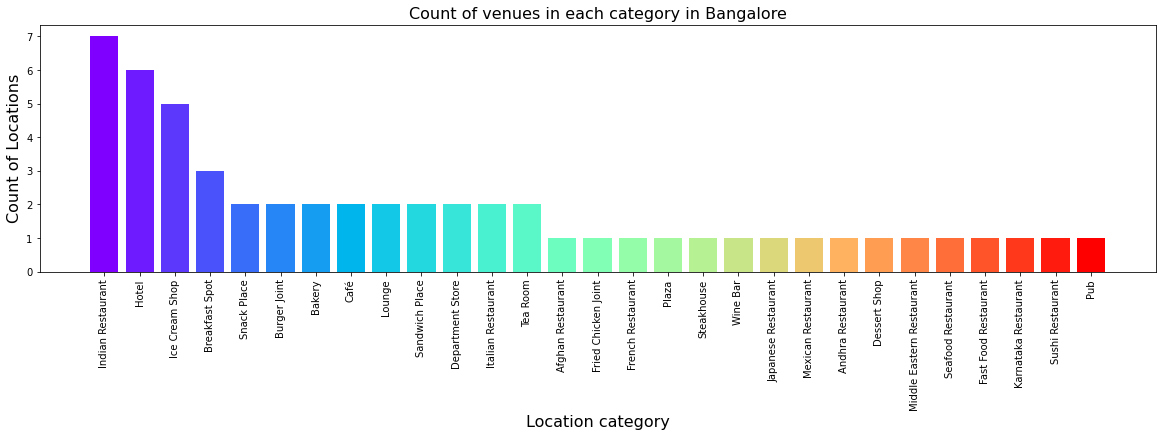

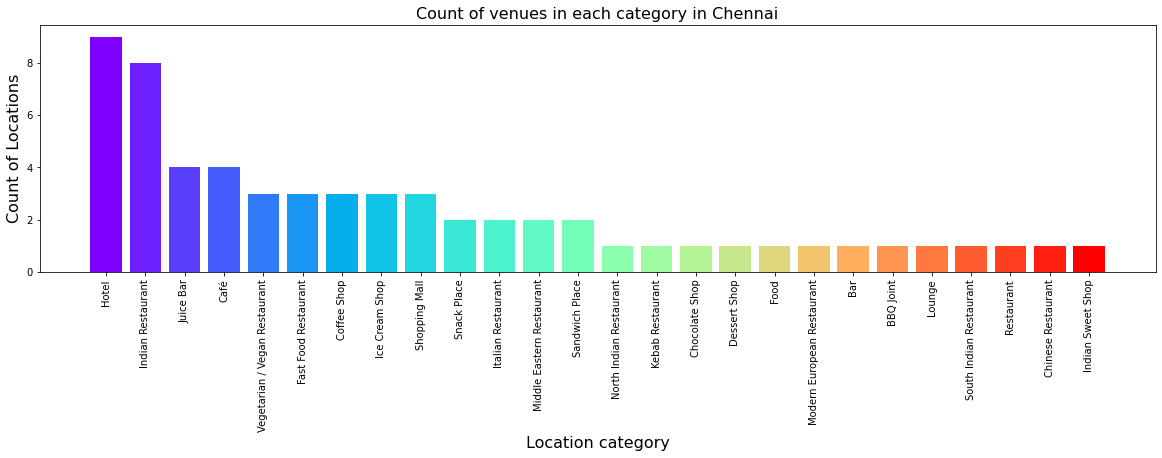

In [64]:
venue_distribution_b = unique_venues_b['categories'].value_counts()
colors_b = cm.rainbow(np.linspace(0, 1, len(venue_distribution_b.index)))
plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
plt.xticks(rotation = 90)
plt.xlabel("Location category", fontsize = 16)
plt.ylabel("Count of Locations", fontsize = 16)
plt.title("Count of venues in each category in Bangalore", fontsize = 16)
plt.bar(venue_distribution_b.index, venue_distribution_b.values, color = colors_b)

venue_distribution_c = unique_venues_c['categories'].value_counts()
colors_c = cm.rainbow(np.linspace(0, 1, len(venue_distribution_c.index)))
plt.figure(figsize = (20, 10))
plt.subplot(2,1,2)
plt.xticks(rotation = 90)
plt.xlabel("Location category", fontsize = 16)
plt.ylabel("Count of Locations", fontsize = 16)
plt.title("Count of venues in each category in Chennai", fontsize = 16)
plt.bar(venue_distribution_c.index, venue_distribution_c.values, color = colors_c)

###**Cuisines**

<BarContainer object of 52 artists>

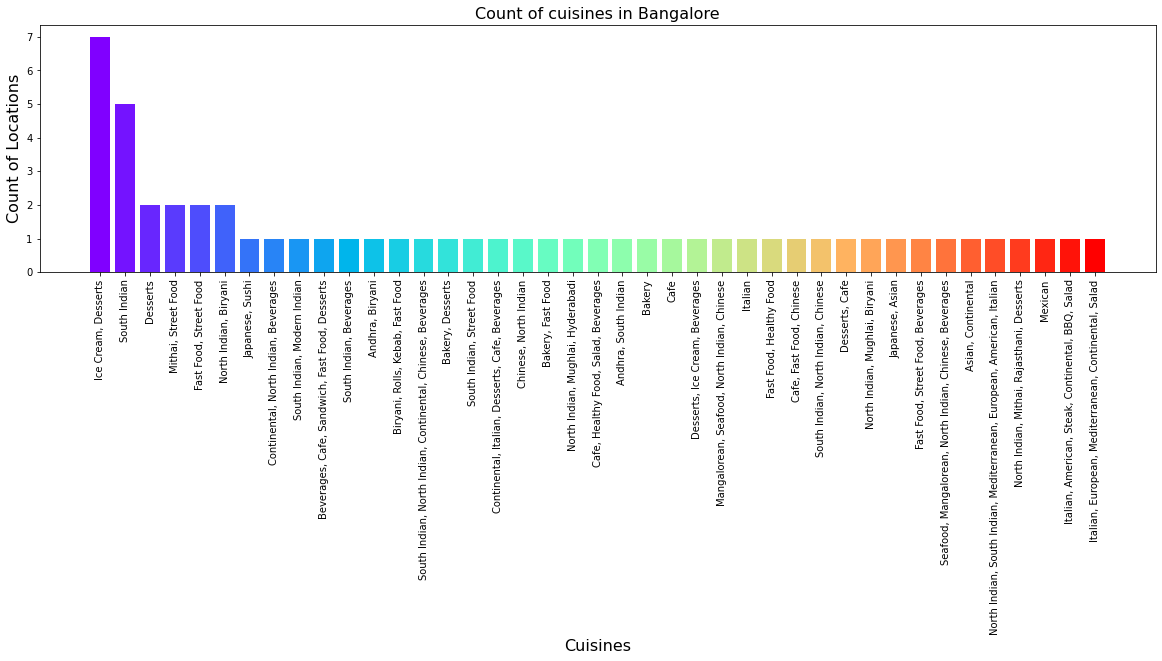

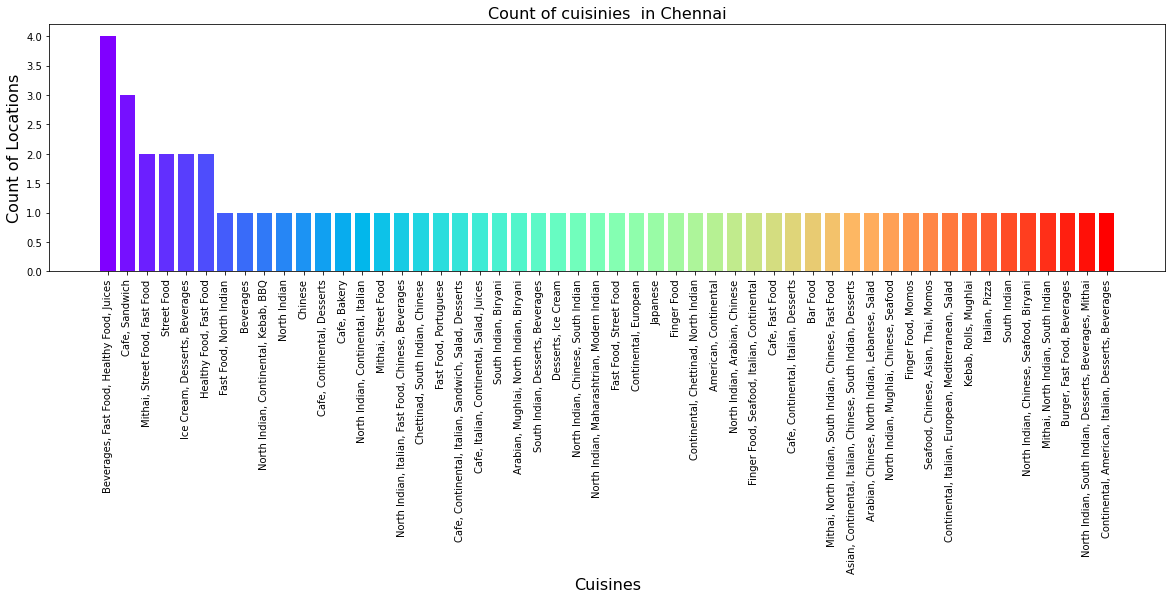

In [66]:
venue_distribution_b = unique_venues_b['cuisine'].value_counts()
colors_b = cm.rainbow(np.linspace(0, 1, len(venue_distribution_b.index)))
plt.figure(figsize = (20, 10))
plt.subplot(2,1,1)
plt.xticks(rotation = 90)
plt.xlabel("Cuisines", fontsize = 16)
plt.ylabel("Count of Locations", fontsize = 16)
plt.title("Count of cuisines in Bangalore", fontsize = 16)
plt.bar(venue_distribution_b.index, venue_distribution_b.values, color = colors_b)

venue_distribution_c = unique_venues_c['cuisine'].value_counts()
colors_c = cm.rainbow(np.linspace(0, 1, len(venue_distribution_c.index)))
plt.figure(figsize = (20, 10))
plt.subplot(2,1,2)
plt.xticks(rotation = 90)
plt.xlabel("Cuisines", fontsize = 16)
plt.ylabel("Count of Locations", fontsize = 16)
plt.title("Count of cuisinies  in Chennai", fontsize = 16)
plt.bar(venue_distribution_c.index, venue_distribution_c.values, color = colors_c)

Text(0.5, 1.0, 'Count of locations with given rating in Chennai')

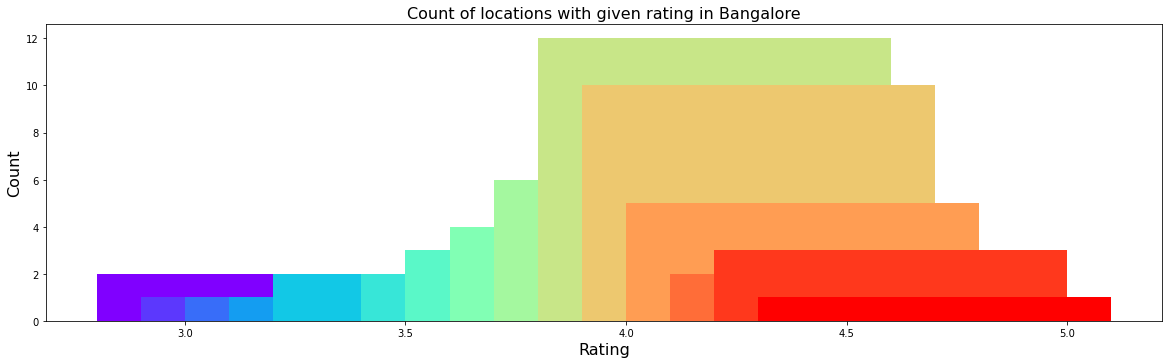

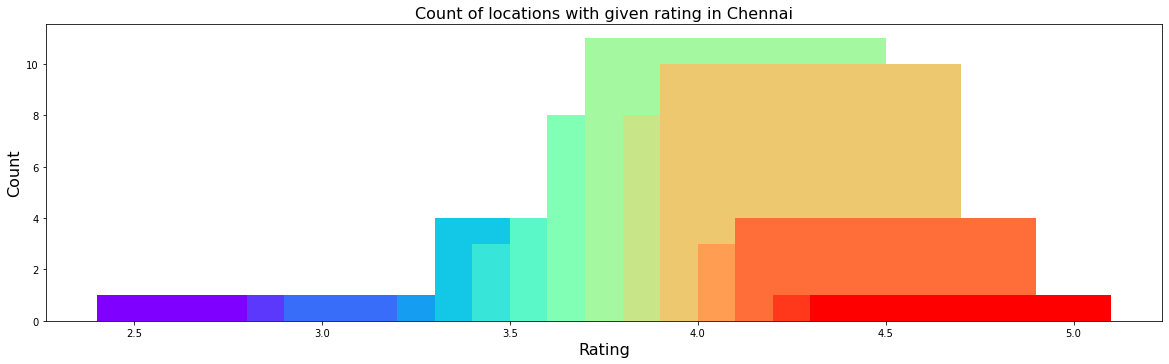

In [68]:
unique_venues_b['rating'] = unique_venues_b['rating'].astype(float)
rating_b = unique_venues_b['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.subplot(2,1,1)
plt.bar(rating_b.index, rating_b.values, color = cm.rainbow(np.linspace(0, 1, len(rating_b.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of locations with given rating in Bangalore", fontsize = 16)

unique_venues_c['rating'] = unique_venues_c['rating'].astype(float)
rating_c = unique_venues_c['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.subplot(2,1,2)
plt.bar(rating_c.index, rating_c.values, color = cm.rainbow(np.linspace(0, 1, len(rating_c.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of locations with given rating in Chennai", fontsize = 16)

###**Ratings**

In [0]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

unique_venues_b['rating_bin'] = pd.cut(unique_venues_b['rating'].astype(float), bins = bins, labels = labels, include_lowest = True) # Bangalore
unique_venues_c['rating_bin'] = pd.cut(unique_venues_c['rating'].astype(float), bins = bins, labels = labels, include_lowest = True) # Chennai


In [70]:


bl_map = folium.Map(location = [BLR_Lat, BLR_Long], zoom_start = 12)

for name, address, latitude, longitude, rating_bin in zip(unique_venues_b['venue'],unique_venues_b['address'],unique_venues_b['latitude'],unique_venues_b['longitude'],unique_venues_b['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(bl_map)  

bl_map.save("Venues Ratings_b.html")
bl_map

In [71]:

ch_map = folium.Map(location = [CHN_Lat, CHN_Long], zoom_start = 12)

for name, address, latitude, longitude, rating_bin in zip(unique_venues_c['venue'],unique_venues_c['address'], unique_venues_c['latitude'], unique_venues_c['longitude'], unique_venues_c['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(ch_map)  

ch_map.save("Venues Ratings_c.html")
ch_map

###**Average Price**

Text(0.5, 1.0, 'No of venues in Chennai with range of average price')

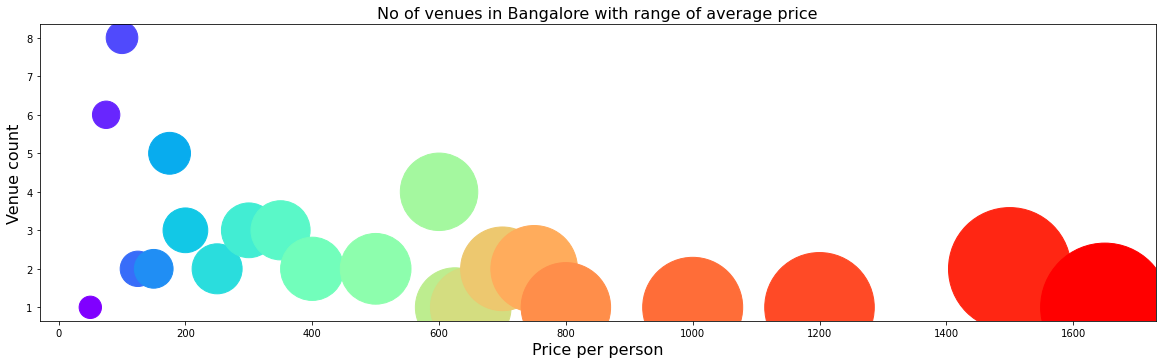

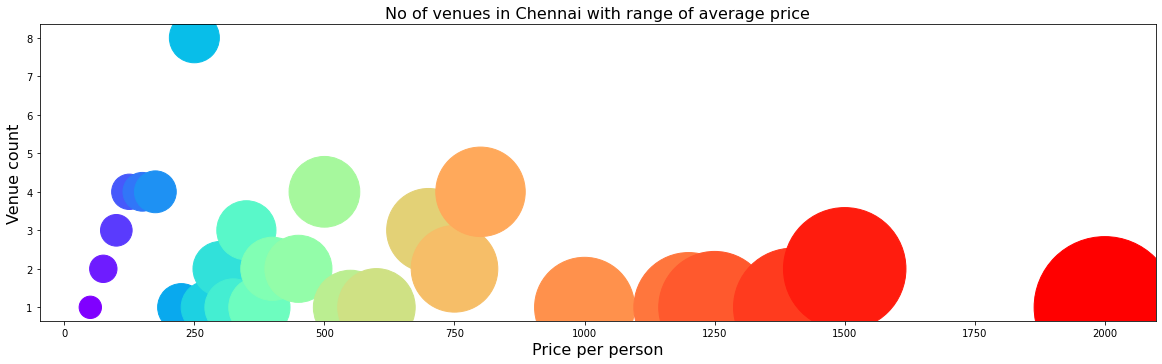

In [73]:
average_prices_b = unique_venues_b['avg_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.subplot(2,1,1)
plt.scatter(average_prices_b.index, 
            average_prices_b.values, 
            s = average_prices_b.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices_b.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("No of venues in Bangalore with range of average price", fontsize = 16)

average_prices_c = unique_venues_c['avg_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.subplot(2,1,2)
plt.scatter(average_prices_c.index, 
            average_prices_c.values, 
            s = average_prices_c.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices_c.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("No of venues in Chennai with range of average price", fontsize = 16)

In [74]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

bl_map = folium.Map(location = [BLR_Lat, BLR_Long], zoom_start = 12)

for name, address, latitude, longitude, price_range in zip(unique_venues_b['venue'], 
                                                          unique_venues_b['address'], 
                                                          unique_venues_b['latitude'], 
                                                          unique_venues_b['longitude'], 
                                                          unique_venues_b['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(bl_map)  

bl_map.save("Price Ratings_b.html")
bl_map

In [75]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

ch_map = folium.Map(location = [CHN_Lat, CHN_Long], zoom_start = 12)

for name, address, latitude, longitude, price_range in zip(unique_venues_c['venue'], 
                                                          unique_venues_c['address'], 
                                                          unique_venues_c['latitude'], 
                                                          unique_venues_c['longitude'], 
                                                          unique_venues_c['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(ch_map)  

ch_map.save("Price Ratings_c.html")
ch_map

###**Clustering**

#### Venues in Bangalore

In [77]:
from sklearn.cluster import KMeans

k = 3

clustering = unique_venues_b.drop(['venue', 'address', 'rating_bin', 'categories','cuisine'], axis=1)

kmeans = KMeans(n_clusters = k, random_state = 0).fit(clustering)

kmeans.labels_[0:10]   # labels for locations in Bangalore

array([2, 1, 2, 1, 2, 0, 0, 2, 0, 0], dtype=int32)

In [78]:
unique_venues_b.insert(0, 'Cluster Labels', kmeans.labels_)

unique_venues_b.head()

,Cluster Labels,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price,rating_bin
0,2,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...","Asian, Continental",600.0,Good
1,1,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Italian, European, Mediterranean, Continental,...",1200.0,Very good
2,2,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Continental, Italian, Desserts, Cafe, Beverages",750.0,Very good
3,1,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...","Japanese, Asian",1500.0,Very good
4,2,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.3,"131, 4th Floor, Devatha Plaza, Residency Road,...","Japanese, Sushi",1000.0,Very good


In [79]:
b_map = folium.Map(location = [BLR_Lat, BLR_Long], zoom_start = 12)
color_map = { 0: 'green', 1: 'blue',2:'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(unique_venues_b['venue'], 
                                                        unique_venues_b['address'], 
                                                        unique_venues_b['Cluster Labels'], 
                                                        unique_venues_b['latitude'], 
                                                        unique_venues_b['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(b_map)

# add cluster centers to the map
for index, cluster in enumerate(kmeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(b_map)

b_map.save("Venues Clusters_b.html")
b_map

In [80]:
c0 = unique_venues_b[unique_venues_b['Cluster Labels'] == 0]
print("Cluster 0")
c0

Cluster 0


,Cluster Labels,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price,rating_bin
5,0,Ice Cream Shop,Corner House Ice Cream,12.9732,77.6000,1.0,4.4,"4, Madras Bank Road, Lavelle Road, Bangalore","Ice Cream, Desserts",175.0,Very good
6,0,Burger Joint,Natural Ice Cream,12.9714,77.6010,1.0,4.2,"20, Ground Floor, 15/16, House Of Lords, St. M...","Ice Cream, Desserts",100.0,Very good
8,0,Ice Cream Shop,Natural Ice Cream,12.9714,77.6010,1.0,4.2,"20, Ground Floor, 15/16, House Of Lords, St. M...","Ice Cream, Desserts",100.0,Very good
9,0,Plaza,Lakeview Milkbar,12.9760,77.6038,2.0,4.0,"89, Kannan Building, MG Road, Bangalore","Desserts, Cafe",250.0,Good
10,0,Breakfast Spot,Pizza Stop,12.9730,77.6001,1.0,3.6,"Airlines Hotel, 4, Madras Bank Road, Lavelle R...",Italian,200.0,Good
11,0,Lounge,Cafe Coffee Day,12.9757,77.6053,2.0,3.4,"84, Ground Floor, Barton Centre, MG Road, Bang...","Beverages, Cafe, Sandwich, Fast Food, Desserts",350.0,Good
13,0,Fried Chicken Joint,Kentacky Chicken Corner,12.9662,77.5951,1.0,4.1,"10, Sampangi Tank Road, Richmond Road, Bangalore","Andhra, South Indian",150.0,Very good
15,0,Café,Matteo Coffea,12.9745,77.6071,2.0,4.3,"2, Church Street, Bangalore",Cafe,300.0,Very good
18,0,Indian Restaurant,Ujwal Restaurant,12.9922,77.5945,2.0,3.9,"204/A, 4/2 Cross, Near Jain Hospital, Millers ...","Mangalorean, Seafood, North Indian, Chinese",350.0,Good
19,0,Ice Cream Shop,Corner House Ice Cream,12.9881,77.5772,1.0,4.5,"29/2, Nagappa Street, Nehrunagar Circle, Sesha...","Ice Cream, Desserts",175.0,Very good


In [81]:
print("There are {} venues in cluster 0 having average price of {:.02f} and mean rating as {:.02f}".
      format(c0.shape[0],c0['price_range'].mean(), c0['rating'].astype(float).mean()))

There are 37 venues in cluster 0 having average price of 1.27 and mean rating as 4.14


In [83]:
c1 = unique_venues_b[unique_venues_b['Cluster Labels'] == 1]
print("Cluster 1")
c1

Cluster 1


,Cluster Labels,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price,rating_bin
1,1,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Italian, European, Mediterranean, Continental,...",1200.0,Very good
3,1,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...","Japanese, Asian",1500.0,Very good
16,1,Hotel,Lapis - The Oberoi,12.9733,77.6182,4.0,3.5,"The Oberoi, 37-39, Trinity Circle, MG Road, Ba...","North Indian, South Indian, Mediterranean, Eur...",1650.0,Good
45,1,Wine Bar,Lotus Pavilion - ITC Gardenia,12.9668,77.5958,4.0,4.2,"ITC Gardenia, 1, Richmond Road, Bangalore","Continental, North Indian, Beverages",1500.0,Very good


In [84]:
print("There are {} venues in cluster 1 having average price of {:.02f} and mean rating as {:.02f}".
      format(c1.shape[0],c1['price_range'].mean(), c1['rating'].astype(float).mean()))

There are 4 venues in cluster 1 having average price of 4.00 and mean rating as 4.10


In [85]:
c2 = unique_venues_b[unique_venues_b['Cluster Labels'] == 2]
print("Cluster 2")
c2

Cluster 2


,Cluster Labels,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price,rating_bin
0,2,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.8,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...","Asian, Continental",600.0,Good
2,2,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...","Continental, Italian, Desserts, Cafe, Beverages",750.0,Very good
4,2,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.3,"131, 4th Floor, Devatha Plaza, Residency Road,...","Japanese, Sushi",1000.0,Very good
7,2,Hotel,Fabelle Chocolate Boutique - ITC Gardenia,12.9671,77.5957,3.0,4.4,"ITC Gardenia, 1, Ashok Nagar, Residency Road, ...","Desserts, Ice Cream, Beverages",625.0,Very good
12,2,Tea Room,Infinitea Tea Room & Tea Store,12.9871,77.5948,3.0,4.3,"2, Shah Sultan Complex, Cunningham Road, Banga...","Fast Food, Healthy Food",650.0,Very good
14,2,Afghan Restaurant,Samarkand,12.9806,77.6047,3.0,4.0,"Gem Plaza, Infantry Road, Bangalore","North Indian, Mughlai, Biryani",800.0,Good
17,2,Pub,The Permit Room,12.9705,77.6103,3.0,4.5,"16/3, Ram Kunj, Commissariat Road, Brigade Roa...","South Indian, Modern Indian",750.0,Very good
20,2,Seafood Restaurant,Mahesh Lunch Home,12.9658,77.5981,3.0,4.2,"Cears Plaza, Opposite Bangalore Club, Residenc...","Seafood, Mangalorean, North Indian, Chinese, B...",700.0,Very good
21,2,Department Store,ROYCE' Chocolate,12.9735,77.6204,3.0,3.6,"Foodhall, 1 MG - Lido Mall, Trinity Circle, MG...",Desserts,500.0,Good
23,2,Steakhouse,The Only Place,12.9731,77.6032,3.0,4.2,"13, Museum Road, Church Street, Bangalore","Italian, American, Steak, Continental, BBQ, Salad",600.0,Very good


In [86]:
print("There are {} venues in cluster 2 having average price of {:.02f} and mean rating as {:.02f}".
      format(c2.shape[0],c2['price_range'].mean(), c2['rating'].astype(float).mean()))

There are 14 venues in cluster 2 having average price of 3.07 and mean rating as 4.09


####Venues in Chennai

In [88]:
k = 3

clustering = unique_venues_c.drop(['venue', 'address', 'rating_bin', 'categories','cuisine'], axis=1)

kmeans = KMeans(n_clusters = k, random_state = 0).fit(clustering)

kmeans.labels_[0:10] # labels for locations in Bangalore

array([0, 0, 0, 0, 0, 2, 0, 0, 1, 2], dtype=int32)

In [89]:
unique_venues_c.insert(0, 'Cluster Labels', kmeans.labels_)

unique_venues_c.head()

,Cluster Labels,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price,rating_bin
0,0,Snack Place,Links,13.0799,80.2545,1.0,4.3,"22, Raja Annamalai Road, Purasavakkam, Chennai","Fast Food, Street Food",125.0,Very good
1,0,Dessert Shop,Bombay Lassi,13.0656,80.2709,1.0,4.7,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",Street Food,50.0,Very good
2,0,Indian Restaurant,Shree Mithai,13.0722,80.2479,1.0,4.6,"18, Dr TV Road, Chetpet, Chennai","Mithai, Street Food, Fast Food",150.0,Very good
3,0,Shopping Mall,Pappa Roti,13.0587,80.2642,2.0,3.2,"Shop S 129, 1st Floor, Express Avenue Mall, Mh...","Cafe, Continental, Desserts",400.0,Good
4,0,Kebab Restaurant,Kabab Corner,13.0599,80.2545,1.0,4.5,"12/1, Opposite Royal Enfield Showroom, Egmore,...","Kebab, Rolls, Mughlai",225.0,Very good


In [90]:
c_map = folium.Map(location = [CHN_Lat, CHN_Long], zoom_start = 12)
color_map = { 0: 'green', 1: 'blue',2:'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(unique_venues_c['venue'], 
                                                        unique_venues_c['address'], 
                                                        unique_venues_c['Cluster Labels'], 
                                                        unique_venues_c['latitude'], 
                                                        unique_venues_c['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(c_map)

# add cluster centers to the map
for index, cluster in enumerate(kmeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(c_map)

c_map.save("Venues Clusters_c.html")
c_map

In [91]:
c0 = unique_venues_c[unique_venues_c['Cluster Labels'] == 0]
print("Cluster 0")
c0

Cluster 0


,Cluster Labels,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price,rating_bin
0,0,Snack Place,Links,13.0799,80.2545,1.0,4.3,"22, Raja Annamalai Road, Purasavakkam, Chennai","Fast Food, Street Food",125.0,Very good
1,0,Dessert Shop,Bombay Lassi,13.0656,80.2709,1.0,4.7,"8, Bahar Agan Street, Anna Salai, Ellis Road, ...",Street Food,50.0,Very good
2,0,Indian Restaurant,Shree Mithai,13.0722,80.2479,1.0,4.6,"18, Dr TV Road, Chetpet, Chennai","Mithai, Street Food, Fast Food",150.0,Very good
3,0,Shopping Mall,Pappa Roti,13.0587,80.2642,2.0,3.2,"Shop S 129, 1st Floor, Express Avenue Mall, Mh...","Cafe, Continental, Desserts",400.0,Good
4,0,Kebab Restaurant,Kabab Corner,13.0599,80.2545,1.0,4.5,"12/1, Opposite Royal Enfield Showroom, Egmore,...","Kebab, Rolls, Mughlai",225.0,Very good
6,0,Ice Cream Shop,Amadora Gourmet Ice Cream & Sorbet,13.0609,80.2495,2.0,4.5,"23, Wallace Garden, 3rd Street, Nungambakkam, ...","Desserts, Ice Cream",250.0,Very good
7,0,Hotel,Welcome Hotel,13.0856,80.2546,1.0,4.5,"112/241, Purasawalkam High Road, Purasavakkam,...","South Indian, Desserts, Beverages",150.0,Very good
14,0,Indian Restaurant,Buhari,13.0663,80.2685,2.0,3.7,"83, Anna Salai, Mount Road, Triplicane, Chennai","North Indian, Chinese, Seafood, Biryani",400.0,Good
15,0,Food,Al-Najeeb Nawab Of Kebab,13.0878,80.2435,2.0,4.1,"Families Complex, Medavakkam Tank Road, Kilpau...","North Indian, Mughlai, Chinese, Seafood",250.0,Very good
16,0,Indian Restaurant,Nair Mess,13.0646,80.2776,1.0,4.3,"22, Mohammed Abdullah, 2nd Street, Opposite Ch...","South Indian, Biryani",100.0,Very good


In [92]:
print("There are {} venues in cluster 0 having average price of {:.02f} and mean rating as {:.02f}".
      format(c0.shape[0],c0['price_range'].mean(), c0['rating'].astype(float).mean()))

There are 37 venues in cluster 0 having average price of 1.49 and mean rating as 4.05


In [93]:
c1 = unique_venues_c[unique_venues_c['Cluster Labels'] == 1]
print("Cluster 1")
c1

Cluster 1


,Cluster Labels,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price,rating_bin
8,1,Hotel,Golden Dragon - Taj Coromandel,13.0585,80.2475,4.0,4.3,"37, Taj Coromandel, Mahatma Gandhi Road, Nunga...",Chinese,1400.0,Very good
21,1,Hotel,Yakiniku - Hyatt Regency,13.0429,80.2486,4.0,3.6,"365, Hyatt Regency, Anna Salai, Teynampet, Che...",Japanese,1250.0,Good
23,1,Hotel,Library Blu - The Leela Palace,13.0171,80.2740,4.0,4.1,"The Leela Palace, Adyar Seaface, MRC Nagar, Ch...",Finger Food,1500.0,Very good
30,1,Hotel,Steam & Whistles - Grand by GRT Hotels,13.0398,80.2451,4.0,4.3,"Grand by GRT Hotels, 120, Sir Thyagaraya Road,...","Finger Food, Momos",1200.0,Very good
47,1,Hotel,On The Rocks - Crowne Plaza Chennai Adyar Park,13.0294,80.2495,4.0,4.2,"Crowne Plaza Chennai Adyar Park, TTK Road, Aus...","Continental, European",2000.0,Very good
55,1,Hotel,The Dining Room - Park Hyatt,13.0107,80.2235,4.0,4.0,"Park Hyatt Chennai, 39, Velachery Road, Guindy...","Continental, Chettinad, North Indian",1500.0,Good


In [94]:
print("There are {} venues in cluster 1 having average price of {:.02f} and mean rating as {:.02f}".
      format(c1.shape[0],c1['price_range'].mean(), c1['rating'].astype(float).mean()))

There are 6 venues in cluster 1 having average price of 4.00 and mean rating as 4.08


In [97]:
c2 = unique_venues_c[unique_venues_c['Cluster Labels'] == 2]
print("Cluster 2")
c2

Cluster 2


,Cluster Labels,categories,venue,latitude,longitude,price_range,rating,address,cuisine,avg_price,rating_bin
5,2,Chocolate Shop,Sandy's Chocolate Laboratory,13.0609,80.2483,3.0,4.4,"16, Wallace Garden, 2nd Street, Nungambakkam, ...","Cafe, Continental, Italian, Desserts",700.0,Very good
9,2,Italian Restaurant,Tuscana Pizzeria,13.0613,80.2499,3.0,4.0,"19, 3rd Street, Wallace Garden Road, Nungambak...","Italian, Pizza",600.0,Good
10,2,Hotel,Entrée,13.0587,80.2632,3.0,3.9,"E Hotel, Gate 1, Lobby Level, Pattulos Road, R...","North Indian, Continental, Italian",700.0,Good
11,2,Café,The Brew Room - The Savera Hotel,13.0458,80.2612,3.0,4.5,"146, RK Salai, Mylapore, Chennai","Cafe, Continental, Italian, Sandwich, Salad, D...",550.0,Very good
12,2,Modern European Restaurant,Basil With A Twist,13.0497,80.2423,3.0,4.4,"58-A, Habibullah Road, T. Nagar, Chennai","Continental, Italian, European, Mediterranean,...",750.0,Very good
13,2,Bar,Sera - The Tapas Bar & Restaurant,13.0456,80.2580,3.0,4.3,"71, Cathedral Road, Gopalapuram, Chennai","Finger Food, Seafood, Italian, Continental",800.0,Very good
19,2,Café,Chamiers Cafe,13.0283,80.2502,3.0,4.2,"106, Chamiers Road, Opposite Crowne Plaza, RA ...","Cafe, Italian, Continental, Salad, Juices",500.0,Very good
22,2,Vegetarian / Vegan Restaurant,Cream Centre,13.0903,80.2164,3.0,4.2,"T10, 4th Main Road, Anna Nagar East, Chennai","North Indian, Italian, Fast Food, Chinese, Bev...",800.0,Very good
37,2,BBQ Joint,Barbeque Nation,13.0526,80.2124,3.0,4.2,"Hotel Bhimaas, 1, Amman Koil Road, Near Muruga...","North Indian, Continental, Kebab, BBQ",800.0,Very good
40,2,Restaurant,Shaack,13.0845,80.2229,2.0,4.0,"F-36, KG Galaxy, 2nd Avenue, Above Fab India, ...","Asian, Continental, Italian, Chinese, South In...",450.0,Good


In [98]:
print("There are {} venues in cluster 2 having average price of {:.02f} and mean rating as {:.02f}".
      format(c2.shape[0],c2['price_range'].mean(), c2['rating'].astype(float).mean()))

There are 18 venues in cluster 2 having average price of 2.94 and mean rating as 4.14
